In [228]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats

import matplotlib as mpl
import os

from pathlib import Path


Populating the interactive namespace from numpy and matplotlib


KeyError: 'datapath'

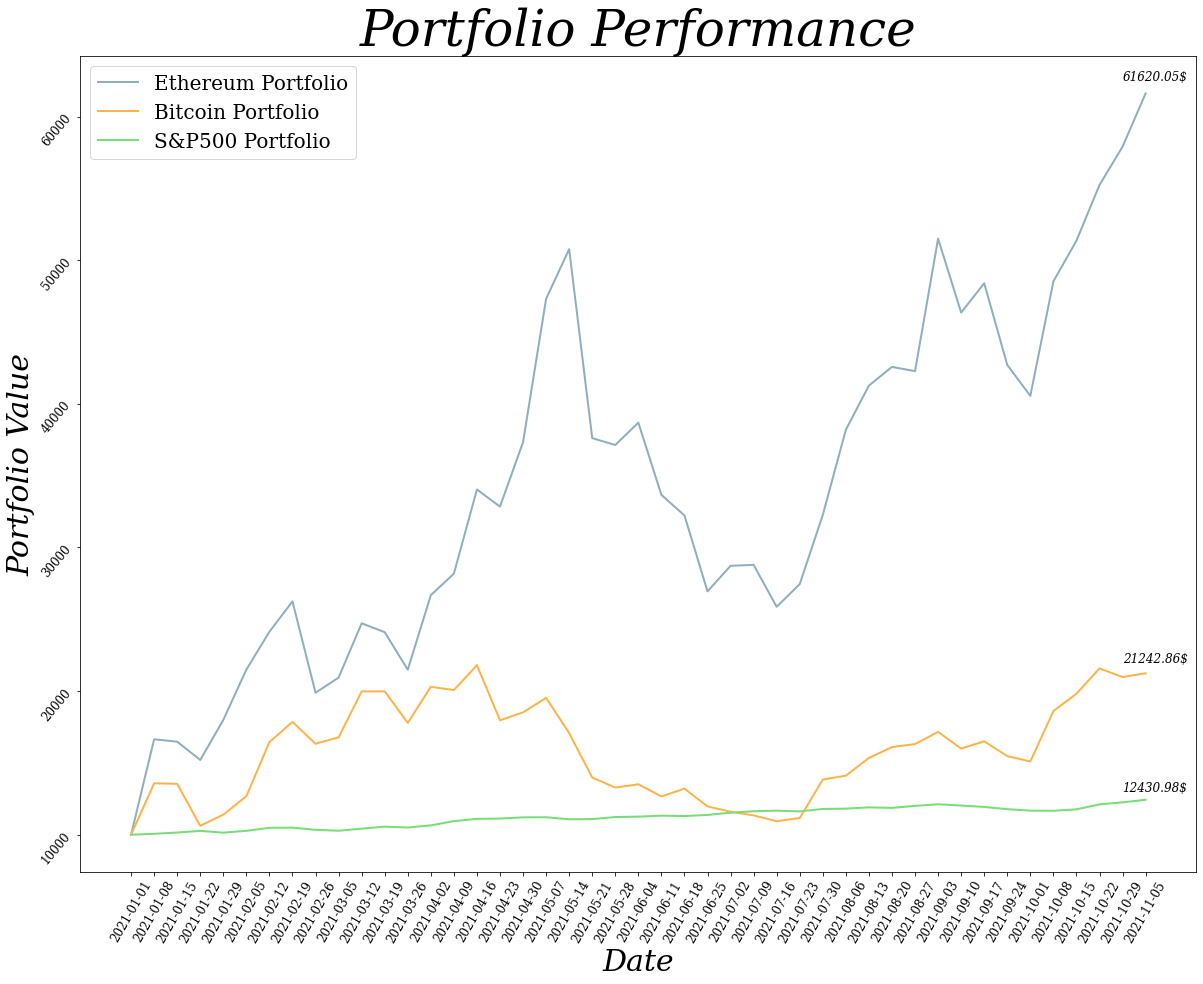

In [244]:
crypto_data = pd.read_csv('./historical_prices.csv', index_col="Date")
sp500_data = pd.read_csv('./SP500.csv')

# Get columns named ETH and WBTC
eth_prices = crypto_data['ETH']
btc_prices = crypto_data['WBTC']
sp500_prices = sp500_data['SP500']

# Get rows of data for this year
eth_prices = eth_prices.iloc[1973:2285]
btc_prices = btc_prices.iloc[1973:2285]

# Get every 7th row for the weekly price
eth_prices = eth_prices.iloc[::7]
btc_prices = btc_prices.iloc[::7]

# Get dates
dateList = sp500_data['DATE'].tolist()

# Get value for account with 10,000$ starting capital
eth_quantity = 10000/eth_prices.iloc[0]
btc_quantity = 10000/btc_prices.iloc[0]
sp500_quantity = 10000/sp500_prices.iloc[0]

# Get list of results for each week of the year
eth_results = []
btc_results = []
sp500_results = []

for dataPoint in range(len(sp500_data.index)):
    eth_results.append(eth_quantity * eth_prices.iloc[dataPoint])
    btc_results.append(btc_quantity * btc_prices.iloc[dataPoint])
    sp500_results.append(sp500_quantity * sp500_prices.iloc[dataPoint])
    
fullData = pd.DataFrame({
    'Date': dateList,
    'Ethereum Portfolio': eth_results,
    'Bitcoin Portfolio': btc_results,
    'S&P500 Portfolio': sp500_results
})
figure(figsize(20,15))
plt.rcParams['font.family'] = "serif"

plot('Date', 'Ethereum Portfolio', data=fullData, color='#8eafbc', linewidth=2)
plot('Date', 'Bitcoin Portfolio', data=fullData, color='#ffb347', linewidth=2)
plot('Date', 'S&P500 Portfolio', data=fullData, color='#77DD77', linewidth=2)
text(43, 62500, str(round(eth_results[-1], 2))+"$", style='italic', fontsize=12)
text(43, 22000, str(round(btc_results[-1], 2))+"$", style='italic', fontsize=12)
text(43, 13000, str(round(sp500_results[-1], 2))+"$", style='italic', fontsize=12)

title('Portfolio Performance', fontsize=50, style='italic')
xlabel('Date', fontsize=30, style='italic')
ylabel('Portfolio Value', fontsize=30, style='italic')
xticks(rotation=60, fontsize=12)
yticks(rotation=50, fontsize=12)
legend(fontsize=20)

plt.savefig('plot.png', dpi=300, bbox_inches='tight')

plt.show()


